In [1]:
using Pkg
Pkg.activate("../../Project.toml")

using ITensors
using Plots
using Random
using Interpolations
using LegendrePolynomials

include("../RealRealFast_generic.jl")
include("../benchmarking/benchUtils.jl")

  Activating project at `~/Documents/QML Project/QuantumInspiredML`


expand_dataset (generic function with 1 method)

In [12]:
(X_train, y_train), (X_val, y_val), (X_test, y_test) = load_splits_txt("../datasets/ECG_train.txt", 
"../datasets/ECG_val.txt", "../datasets/ECG_test.txt");
X_train = vcat(X_train, X_val);
y_train = vcat(y_train, y_val);

scaler = fit_scaler(RobustSigmoidTransform, X_train; range=Options(encoding=Basis("Fourier")).encoding.range);
    X_train_scaled = transform_data(scaler, X_train)
    X_val_scaled = transform_data(scaler, X_val)
    X_test_scaled = transform_data(scaler, X_test);

In [28]:
hists = [histogram(x,bins=20, xlims=[0,1]) for x in eachcol(X_train_scaled)];

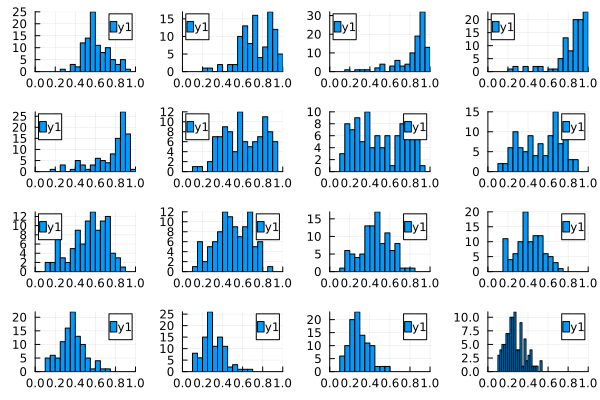

In [29]:
plot(hists[1:16]...)

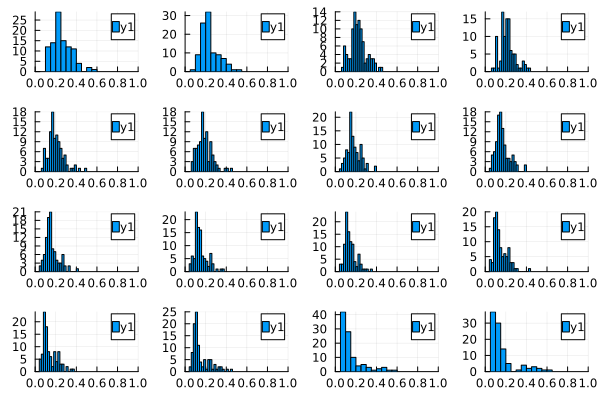

In [30]:
plot(hists[17:32]...)

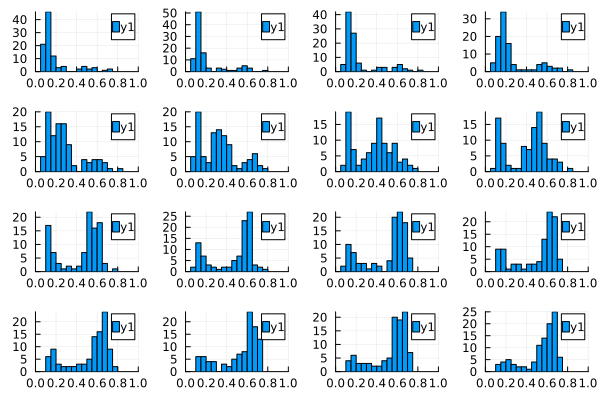

In [31]:
plot(hists[33:48]...)

In [19]:
xs = -1:1/500:1

ds = 1:5
pls = []
for i in ds
    global ys = [Pl(x, i; norm = Val(:normalized)) for x in xs]
    push!(pls, plot(xs,ys))
end

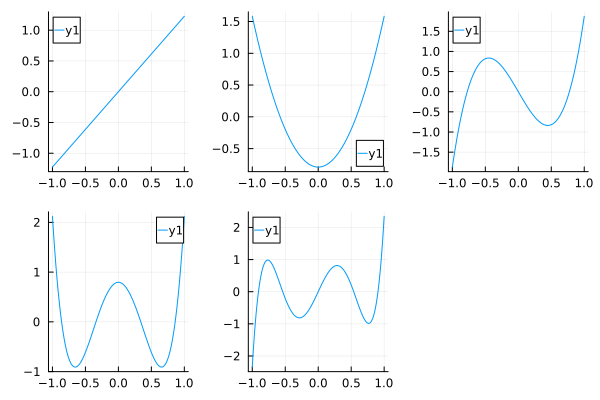

In [20]:
plot(pls...)

In [21]:
i = 1
ys =  [Pl(x, i; norm = Val(:normalized)) for x in xs]

1001-element Vector{Float64}:
 -1.224744871391589
 -1.2222953816488058
 -1.2198458919060227
 -1.2173964021632393
 -1.2149469124204562
 -1.212497422677673
 -1.2100479329348899
 -1.2075984431921067
 -1.2051489534493236
 -1.2026994637065402
  ⋮
  1.2051489534493236
  1.2075984431921067
  1.2100479329348899
  1.212497422677673
  1.2149469124204562
  1.2173964021632393
  1.2198458919060227
  1.2222953816488058
  1.224744871391589

In [41]:
function plot_hists(data,bins)
    nbins = length(bins) - 1
    h1 = histogram(data,bins=0:1/nbins:1, xlim=[0,1], title="Base Hist",color=:red,)
    scatter!(data,[5 for _ in data], label="Raw Data", color=:black, markershape=:xcross, legend=:none)
    
    h2 = histogram(data, bins=bins, xlim=[0,1], label="Scaled", title = "Scaled Hist")
    scatter!(data,[5 for _ in data], label="Raw Data", color=:black, markershape=:xcross, legend=:none)
    return plot(h1,h2, layout=(2,1), size=(600,400))
end

function make_bins_old(data, nbins)
    npt = length(data)
    A = sort(data)
    A_x = 0:(npt-1)
    nodes = (A_x,)
    itp = interpolate(nodes, A, Gridded(Linear()));
    xs = collect(0:npt/(nbins-1):(npt-1))
    bins = [itp(x) for x in xs]
    bins[1] = 0
    bins[end] = 1
    return bins
end

function make_bins(data, nbins)
    npts = length(data)
    bin_pts = Int(round(npts/nbins))

    bins = Vector{eltype(data)}(undef, nbins+1)
    bins[1] = 0
    j = 2
    ds = sort(data)
    for (i,x) in enumerate(ds)
        if i % bin_pts == 0 && i < length(data)
            bins[j] = (x + ds[i+1])/2
            j += 1
        end
    end
    bins[end] = 1
    return bins
end

make_bins (generic function with 1 method)

In [42]:
nbins = 12
bins = [make_bins_old(x,nbins) for x in eachcol(X_train_scaled)];
# bins2 = [make_bins(x,nbins) for x in eachrow(X_train_scaled)];

96-element Vector{Vector{Float64}}:
 [0.0, 0.27547537129527383, 0.4812847614506691, 0.5233871220320684, 0.5627444381008657, 0.5810421291014278, 0.5959263378321658, 0.6420630777683127, 0.7269647491676967, 0.7804858793981055, 1.0]
 [0.0, 0.20150701190041787, 0.5669730653650081, 0.6309657357902312, 0.6636637985395288, 0.7221737861863324, 0.7591171329821824, 0.8570214754164571, 0.8853081613954286, 0.9296631788539966, 1.0]
 [0.0, 0.16708318336472125, 0.6339863251519048, 0.7551324927468135, 0.8355855065984662, 0.8698745628958398, 0.9045559081287706, 0.922464217323462, 0.9331965490431877, 0.9651650845528517, 1.0]
 [0.0, 0.2056182850309771, 0.7068673352418746, 0.779980735471915, 0.8282417151667101, 0.8782764083233046, 0.899088469775702, 0.9184800894092636, 0.9515350368162768, 0.9655474399041872, 1.0]
 [0.0, 0.1780105765572868, 0.4937704328622211, 0.6469754731832873, 0.7660928579013917, 0.818571983865604, 0.8531263291551777, 0.8741524068717934, 0.8955690806921278, 0.9229243338993351, 1.0]
 [0.0

In [49]:
plts = [plot_hists(x,bins[i][1:3]) for (i,x) in enumerate(eachcol(X_train_scaled))];
# plts2 = [plot_hists(x,bins2[i]) for (i,x) in enumerate(eachrow(X_train_scaled))];

96-element Vector{Plots.Plot{Plots.GRBackend}}:
 Plot{Plots.GRBackend() n=4}
 Plot{Plots.GRBackend() n=4}
 Plot{Plots.GRBackend() n=4}
 Plot{Plots.GRBackend() n=4}
 Plot{Plots.GRBackend() n=4}
 Plot{Plots.GRBackend() n=4}
 Plot{Plots.GRBackend() n=4}
 Plot{Plots.GRBackend() n=4}
 Plot{Plots.GRBackend() n=4}
 Plot{Plots.GRBackend() n=4}
 ⋮
 Plot{Plots.GRBackend() n=4}
 Plot{Plots.GRBackend() n=4}
 Plot{Plots.GRBackend() n=4}
 Plot{Plots.GRBackend() n=4}
 Plot{Plots.GRBackend() n=4}
 Plot{Plots.GRBackend() n=4}
 Plot{Plots.GRBackend() n=4}
 Plot{Plots.GRBackend() n=4}
 Plot{Plots.GRBackend() n=4}

In [51]:
bins[1]

11-element Vector{Float64}:
 0.0
 0.27547537129527383
 0.4812847614506691
 0.5233871220320684
 0.5627444381008657
 0.5810421291014278
 0.5959263378321658
 0.6420630777683127
 0.7269647491676967
 0.7804858793981055
 1.0

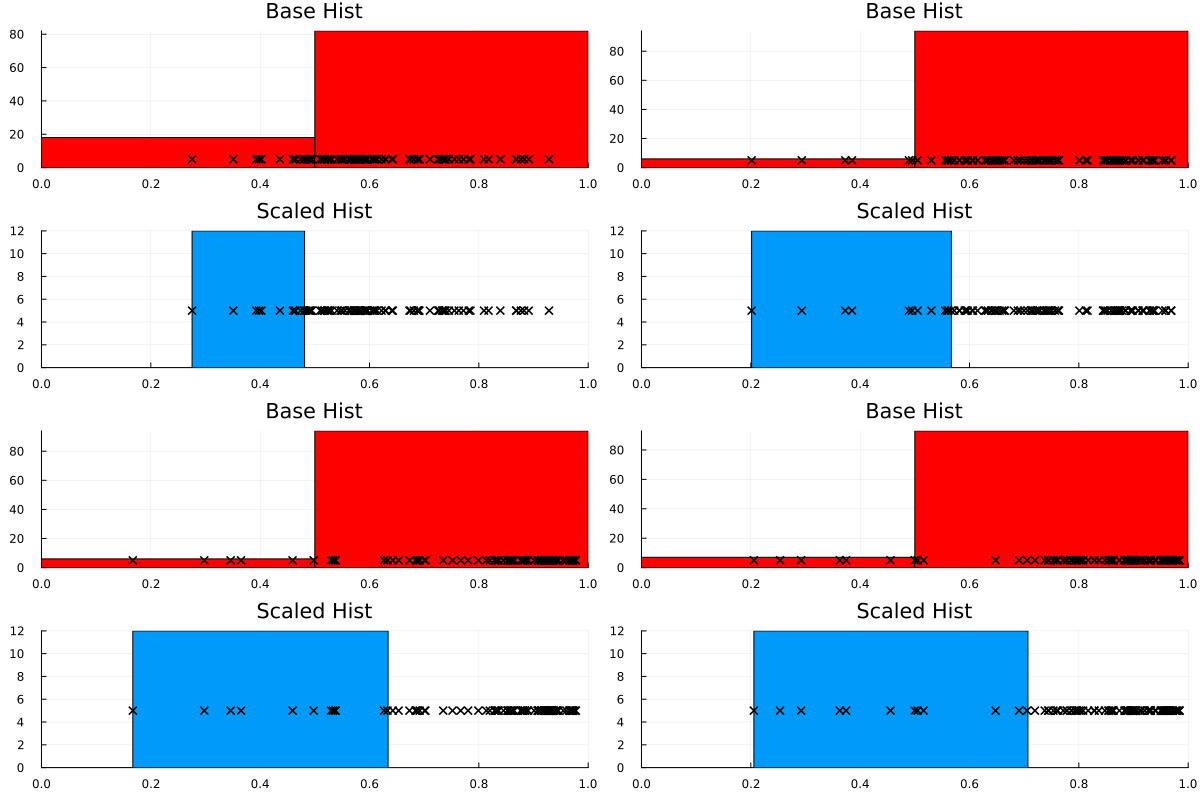

In [50]:
plot(plts[1:4]..., size=(1200,800))

In [16]:
function rect(x)
    return  abs(x) == 1/2 ? 1/2 : float(-0.5 < x < 0.5)
end

rect (generic function with 1 method)

In [17]:
function generate_rectbasis(bins::Vector{Float64}; aux::Union{Function, Vector{Function}}=identity)
    widths = diff(bins)
    if aux isa Function
        return x -> [rect((x - bins[i])/dx - 0.5)/dx for (i,dx) in enumerate(widths)]
    else
        x -> vcat([[rect((x - bins[i])/dx - 0.5)/dx * f((x-bins[i])/dx) for f in aux] for (i,dx) in enumerate(widths)]...)
    end
end

generate_rectbasis (generic function with 1 method)

In [19]:
xs = 0:1/500:1

aux = [x->1,x->cospi(2*x), x->sinpi(2*x)]

ys = Matrix{Float64}(undef, length(xs), length(aux)*(length(bins[1]) - 1))

for i in 1:size(ys,1)
    ys[i,:] = generate_rectbasis(bins[1]; aux=aux).(xs)[i]
end
#p = plot(xs, ys)


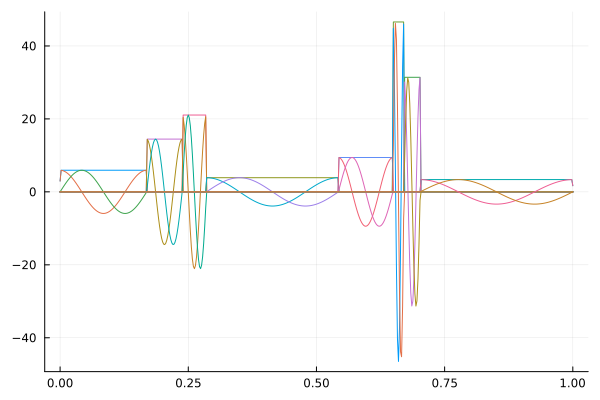

In [20]:
plot(xs,ys, legend=:none)

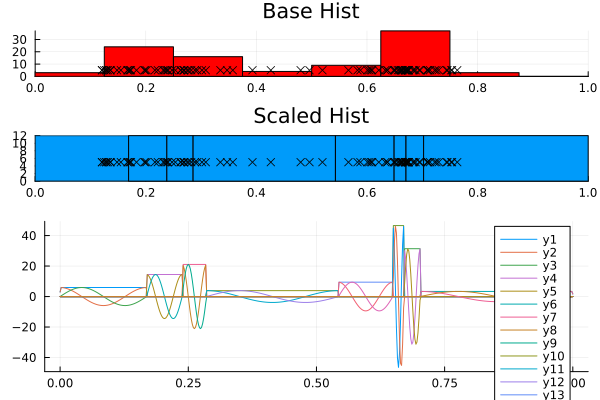

In [21]:
plot(plts[1], plot(xs,ys),layout=(2,1))
